# Decision Tree
Using the same seattle weather data as last chapter develop a DecisionTree model


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549


#create an empty dataframe to hold values
DecisionTree_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[True] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

DecisionTree_df = DecisionTree_df.reindex(columns=seq)



In [19]:
#populate the DecisionTree data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    DecisionTree_df.iat[i,1] = tomorrow
    DecisionTree_df.iat[i,0] = today

DecisionTree_df = DecisionTree_df.dropna() #exclude any rows with missing data

In [20]:
DecisionTree_df

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
...,...,...
25544,0.00,False
25545,0.00,False
25546,0.00,False
25547,0.00,False


In [21]:
#modify the data to work with this model
x = DecisionTree_df.today.values
y = DecisionTree_df.tomorrow.values
x = x.reshape(DecisionTree_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [22]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(criterion='entropy').fit(x, y)

In [23]:
#we can calculate the accuarcy using score
score = clf.score(x,y)
print(score)

0.7129883347686526


In [24]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[11461  3183]
 [ 4149  6753]]


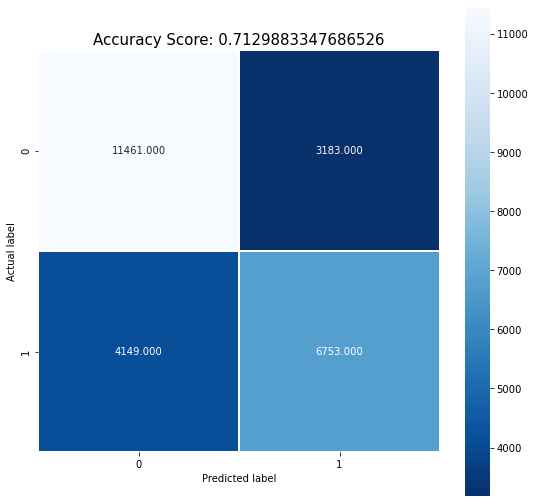

In [25]:
#Conf Matrix

#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [39]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()

### From this point modify the scikit-learn random forest method to use two or more variables.

In [32]:

#create an empty dataframe to hold values
DecisionTree_df2 = pd.DataFrame({
                              'yesterday':[0.0]*numrows,
                             'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = [
       'yesterday',
       'today',
       'tomorrow']
DecisionTree_df2 = DecisionTree_df2.reindex(columns=seq)

In [33]:
for z in range(numrows):
    #pull values from the dataframe
    yesterday = df.iloc[(z-2),1]
    today = df.iloc[(z-1),1]
    tomorrow = df.iloc[z,1]
    
    DecisionTree_df2.iat[z,0] = yesterday
    DecisionTree_df2.iat[z,1] = today
    DecisionTree_df2.iat[z,2] = tomorrow

DecisionTree_df2 = DecisionTree_df2.dropna() #exclude any rows with missing data

In [34]:
DecisionTree_df2.describe

<bound method NDFrame.describe of        yesterday  today  tomorrow
0           0.00   0.00      0.47
1           0.00   0.47      0.59
2           0.47   0.59      0.42
3           0.59   0.42      0.31
4           0.42   0.31      0.17
...          ...    ...       ...
25544       0.00   0.00      0.00
25545       0.00   0.00      0.00
25546       0.00   0.00      0.00
25547       0.00   0.00      0.00
25548       0.00   0.00      0.00

[25542 rows x 3 columns]>

In [37]:

X = DecisionTree_df2[['yesterday', 'today']]
Y = DecisionTree_df2['tomorrow']

mymodel = tree.DecisionTreeClassifier(criterion='entropy').fit(x, y)

In [38]:
#we can calculate the accuarcy using score
score = mymodel.score(x,y)
print(score)

0.7129883347686526
